# Plotting Gallery

In [1]:
import pandas as pd
fm = pd.read_csv('../fm.csv', index_col='trip_log_id')

**Pie Charts**

A *pie chart* does a good job of showing the distribution of different categorical variables. The `piechart` function makes it easy to see what a variety of parameters would look like:

![<!--- piechart --->](img/piechart.gif)
  
We can play with the sliders to find the image that looks just right. The *Merge Slider* make an "Other" category by combining together infrequent values. The *Drop Slider* in a sense does the opposite: it removes high frequency values from the total. In this example, that's a reasonable thing to do since we don't want to include `JFK` or `LGA` in flights to NYC.

Once we've settled on a parameter set, we can make a static plot by setting `static=True` with the parameters we like.

In [2]:
from henchman.plotting import show
import henchman.plotting as hplot
from bokeh.palettes import Category20b_20

show(hplot.piechart(fm['flights.dest'], 
                           drop_n=2, mergepast=10), 
     title='Destination Airport for flights from NYC', static=True, width=620, colors=Category20b_20)

In [3]:
from henchman.plotting import show
from henchman.plotting import gridplot
import henchman.plotting as hplot

p1 = show(hplot.piechart(fm['flights.dest'], 
                         drop_n=0, mergepast=10), 
          title='Destination Airport for flights from NYC', static=True, width=310, height=325, fig=True)
p2 = show(hplot.piechart(fm['flights.carrier'], 
                         sort=False, mergepast=None),
          title='Airline percentages for flights to NYC', static=True, width=310, height=325, fig=True)

gridplot([p1, p2], n_cols=2)

**Histograms**

A histogram is a way of showing the distribution of a numeric variable. Histograms can be tricky: small changes to input parameters can dramatically change what the final graph will look like. In particular, the *number of bins* (`n_bins`) and the excluded values (`col_max` and `col_min`) change the height of particular bars! To sidestep this, we have an interactive method for histograms as well

![<!--- histogram --->](img/histogram.gif)

Once we've settled on parameters, we can once again set `static=True` to get a static plot that looks just how we would like.

In [4]:
from henchman.plotting import gridplot
import henchman.plotting as hplot
p1 = show(hplot.histogram(fm['flights.MEAN(trip_logs.arr_delay)'], 
                            n_bins=50),
     title='Histogram of average flight delay', height=320, width=310, static=True, fig=True)

p2 = show(hplot.histogram(fm['flights.MEAN(trip_logs.arr_delay)'], 
                            n_bins=50, col_max=120),
     title='Histogram of average flight delay with col_max', height=320, width=310, static=True, fig=True)

p3 = show(hplot.histogram(
                fm['flights.MEAN(trip_logs.arr_delay)'], 
                fm['label'], 
                n_bins=50,
                col_max=150,
                normalized=False),
          title='Actual delays overlayed over historical delays (real)', height=160, width=620, static=True, fig=True)

p4 = show(hplot.histogram(
                fm['flights.MEAN(trip_logs.arr_delay)'], 
                fm['label'], 
                n_bins=50,
                col_max=150,
                normalized=True),
          title='Actual delays overlayed over historical delays (normalized)', height=160, width=620, static=True, fig=True)

gridplot([[p1, p2], [p3], [p4]])

**Bivariate Plots**

The scatter plots provide an opportunity to explore data in more dimensions. You provide a minimum of two columns to use as the `x` and `y` axes. You can also give a `agg` column to aggregate by and a `label` column which you would like listed in the hover tooltip. 

In this example, we want to look at how distance and delay are related to carrier. We can look at the maximum delay and distance per carrier and the average delay and distance to get a good idea of how that carrier is operating out of NYC.

![<!--- scatter --->](img/scatter.gif)


In [5]:
from henchman.plotting import show
import henchman.plotting as hplot
show(hplot.scatter(fm['distance'], fm['flights.MEAN(trip_logs.arr_delay)'], agg=fm['flights.carrier'], 
                   label=fm['label'], aggregate='mean'),
     y_axis='Mean Delay by Carrier', x_axis='Mean Distance by Carrier', 
     title='Average Distance and Delay by Carrier', static=True)

When we have a time column, we can see how different numeric columns change over time. In this example, we look at how the `label` changes over time. Here, we can pin down the date of a particular winter storm where 89% of flights on January 6 2017 were delayed

![<!--- timeseries --->](img/timeseries.gif)


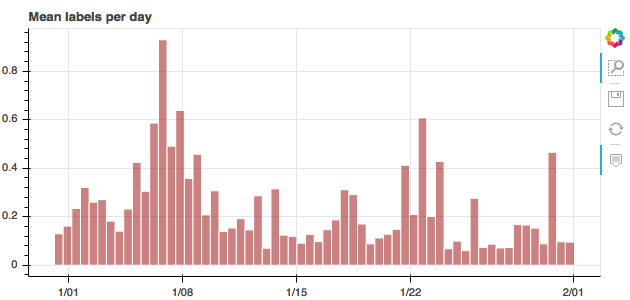

In [6]:
show(hplot.timeseries(fm['time'], fm['label'], n_bins=60, col_max='2017-02-01'), 
     title='Mean labels per day', height=300, width=630, png=True, colors=['#990000', 'white'])